In [3]:
!pip install wordcloud matplotlib seaborn scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [7]:
df = pd.read_csv('D:\Princy\Internship\Edunet\Project\Hopsital Dataset.csv')
print(df.shape)
df.head(10)

(833, 10)


,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85,19/12/2019 14:41:49,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1,IV,BD,7,icm
1,87,19/12/2019 16:35:25,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1,IV,BD,1,post op
2,82,19/12/2019 15:48:49,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.4,IV,BD,3,abd distension with leg swelling
3,82,19/12/2019 15:50:33,Male,"type-2 dm, ihd, col, copd, ht",cefipime,1,IV,BD,5,abd distension with leg swelling
4,82,19/12/2019 15:52:20,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.5,Oral,OD,3,abd distension with leg swelling
5,82,19/12/2019 15:53:30,Male,"type-2 dm, ihd, col, copd, ht",ceftazidime,1,IV,TDS,3,abd distension with leg swelling
6,55,19/12/2019 16:00:41,Female,abd tb,ceftriaxone,1,IV,BD,3,abd tb
7,55,19/12/2019 16:02:32,Female,abd tb,septrin,0.96,Oral,OD,1,abd tb
8,57,19/12/2019 16:28:56,Male,"abscess on chin, uncontrolled type 2 dm, koch'...",co-amoxiclav,1.2,IV,TDS,4,abscess on chin
9,57,19/12/2019 16:31:43,Male,"abscess on chin, uncontrolled type 2 dm, koch'...",clindamycin,0.2,Oral,TDS,7,abscess on chin


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 833 non-null    object
 1   Date of Data Entry  833 non-null    object
 2   Gender              833 non-null    object
 3   Diagnosis           833 non-null    object
 4   Name of Drug        833 non-null    object
 5   Dosage (gram)       833 non-null    object
 6   Route               833 non-null    object
 7   Frequency           833 non-null    object
 8   Duration (days)     833 non-null    object
 9   Indication          832 non-null    object
dtypes: object(10)
memory usage: 65.2+ KB


In [10]:
def preprocess_data(df):
    """Cleans and preprocesses the dataset."""
    # Convert columns to appropriate data types
    for col in ['Age', 'Dosage (gram)', 'Duration (days)']:
        df[f'{col}_cleaned'] = pd.to_numeric(df[col], errors='coerce')
    
    df['Date of Data Entry_cleaned'] = pd.to_datetime(df['Date of Data Entry'], errors='coerce')

    # Drop rows with missing values in critical columns
    df = df.dropna(subset=['Age_cleaned', 'Dosage (gram)_cleaned', 'Duration (days)_cleaned', 'Date of Data Entry_cleaned'])

    return df

df = preprocess_data(df)

C:\Users\Princy\AppData\Local\Temp\ipykernel_24164\3826583336.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Data Entry_cleaned'] = pd.to_datetime(df['Date of Data Entry'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 832
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         831 non-null    object        
 1   Date of Data Entry          831 non-null    object        
 2   Gender                      831 non-null    object        
 3   Diagnosis                   831 non-null    object        
 4   Name of Drug                831 non-null    object        
 5   Dosage (gram)               831 non-null    object        
 6   Route                       831 non-null    object        
 7   Frequency                   831 non-null    object        
 8   Duration (days)             831 non-null    object        
 9   Indication                  830 non-null    object        
 10  Age_cleaned                 831 non-null    float64       
 11  Dosage (gram)_cleaned       831 non-null    float64       
 12 

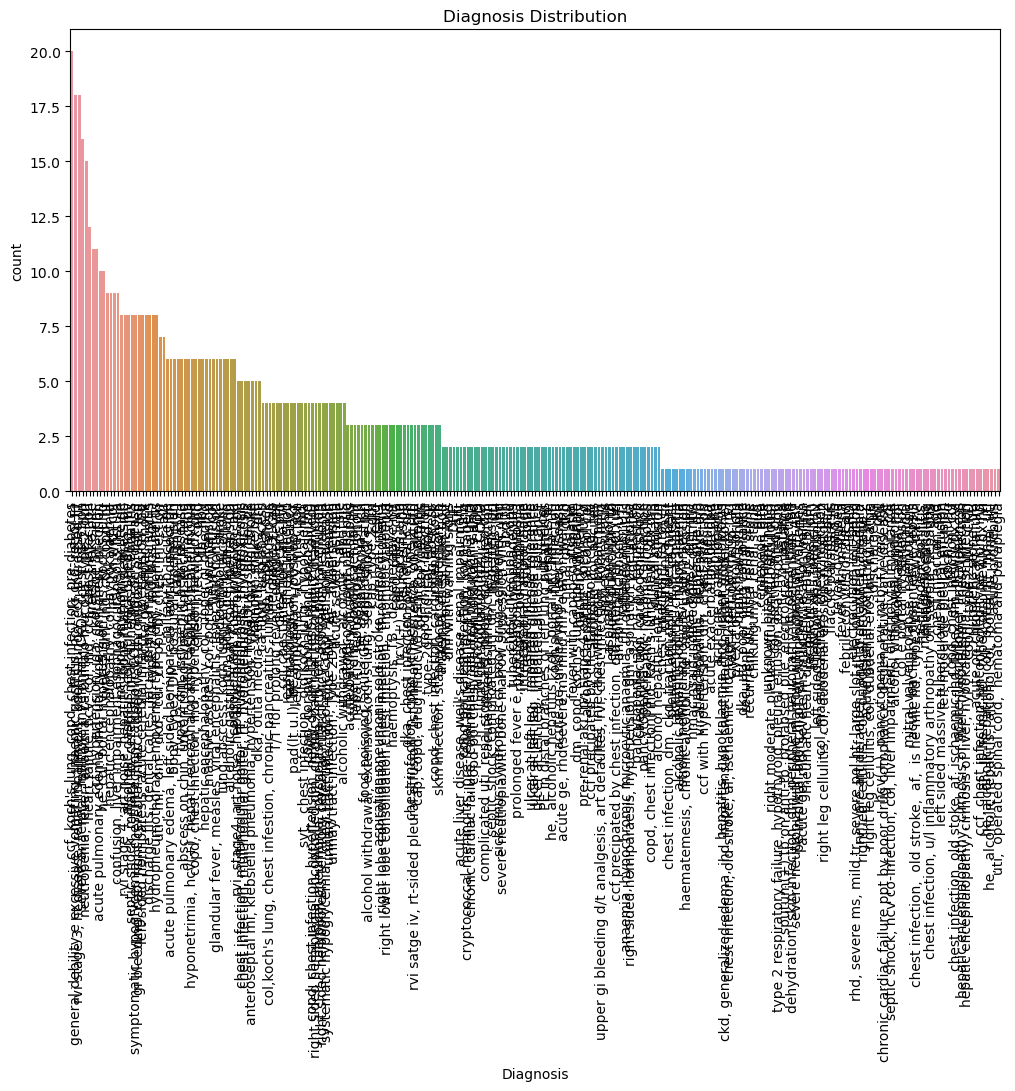

In [14]:
# Exploratory Data Analysis
# Distribution of Diagnoses
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Diagnosis', order=df['Diagnosis'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Diagnosis Distribution')
plt.show()

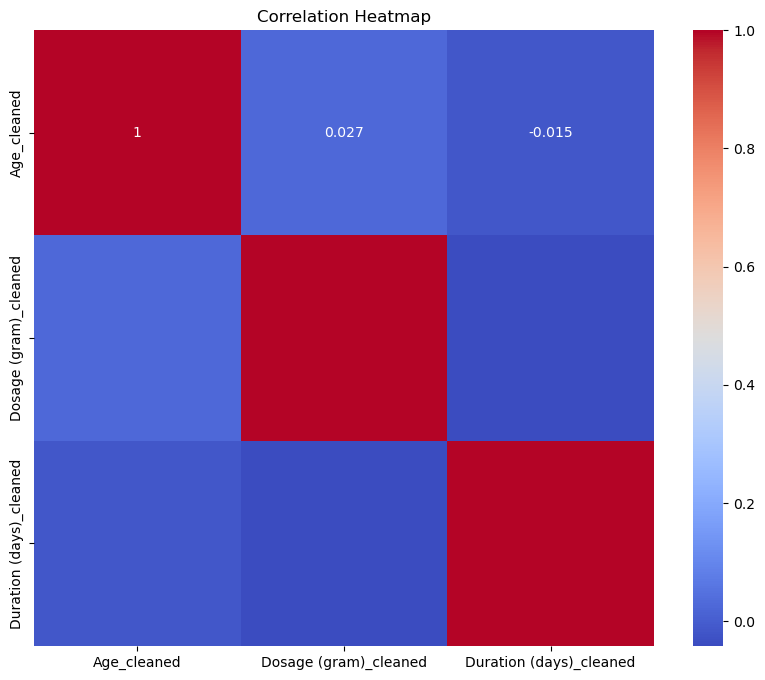

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age_cleaned', 'Dosage (gram)_cleaned', 'Duration (days)_cleaned']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

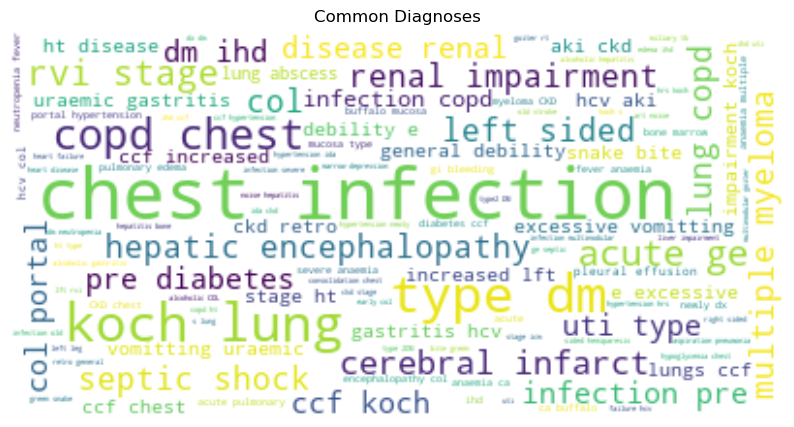

In [16]:
# Word Cloud for Diagnosis
text = ' '.join(df['Diagnosis'].dropna())
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Diagnoses')
plt.show()

In [19]:
# Machine Learning Pipeline
# Encoding categorical variables and feature selection
X = pd.get_dummies(df[['Age_cleaned', 'Dosage (gram)_cleaned', 'Duration (days)_cleaned', 'Diagnosis']], drop_first=True)
y = df['Name of Drug']

In [20]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
final_accuracy = model.score(X_train, y_train)
print("final_accuracy is : ",final_accuracy)

# creating a confusion matrix for determining and visualizing the accuracy score
model_predict = model.predict(X_train)
print(classification_report(y_train, model_predict))

final_accuracy is :  0.9924698795180723
                             precision    recall  f1-score   support

                   amikacin       1.00      1.00      1.00         8
                amoxicillin       0.00      0.00      0.00         2
    amoxicillin+flucloaxcin       1.00      1.00      1.00         1
 amoxicillin+flucloxacillin       1.00      1.00      1.00        22
amoxicillin+flucloxiacillin       1.00      1.00      1.00         1
  amoxicillin+flucoxacillin       1.00      1.00      1.00         2
 amoxicillin+flucoxiacillin       1.00      1.00      1.00         1
               azithromycin       0.83      1.00      0.91         5
                cefaziclime       1.00      1.00      1.00         2
                   cefepime       1.00      1.00      1.00        11
                   cefexime       1.00      1.00      1.00         1
                   cefipime       1.00      0.92      0.96        12
                   cefixime       1.00      1.00      1.00    

C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
final_accuracy = model.score(X_test, y_test)
print("final_accuracy is : ",final_accuracy)

# creating a confusion matrix for determining and visualizing the accuracy score
model_predict = model.predict(X_test)
print(classification_report(y_test, model_predict))

final_accuracy is :  0.8083832335329342
                            precision    recall  f1-score   support

                  amikacin       0.00      0.00      0.00         1
               amoxicillin       0.00      0.00      0.00         2
amoxicillin+flucloxacillin       0.67      0.86      0.75         7
 amoxicillin+flucoxacillin       0.00      0.00      0.00         1
                 amoxiclav       0.00      0.00      0.00         1
                  cefepime       1.00      0.67      0.80         3
                  cefexime       1.00      1.00      1.00         1
                  cefipime       1.00      1.00      1.00         1
                  cefixime       0.73      0.89      0.80         9
              cefoperazone       0.00      0.00      0.00         1
    cefoperazone+sulbactam       0.00      0.00      0.00         1
               ceftazidime       1.00      0.83      0.91         6
               ceftriaxone       0.85      1.00      0.92        45
       

C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Princy\anaconda3\Lib\site-packages\sklearn\metrics\

In [31]:
accuracy_score(y_test, model_predict) * 100

80.83832335329342

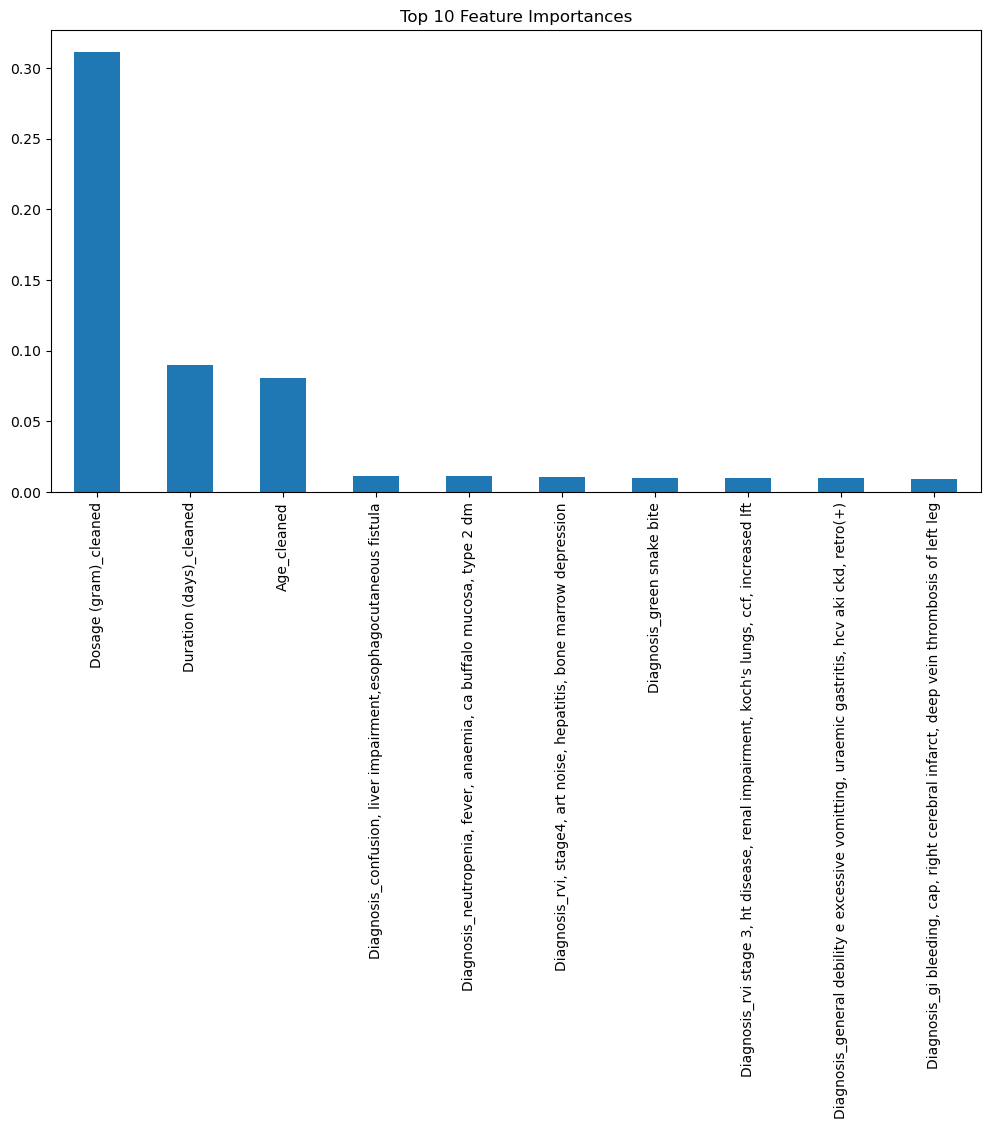

In [27]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feature_importance[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()